In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

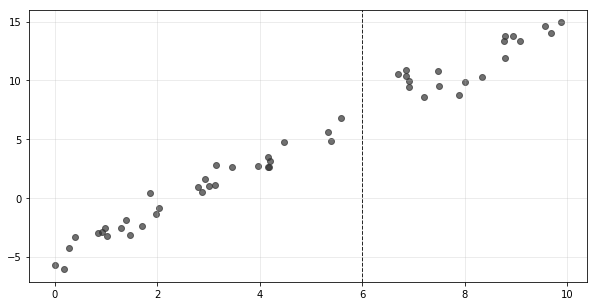

In [277]:
# generate random data
n = 50
rng = np.random.RandomState(1)
x = 10 * rng.rand(n)
y = 2 * x - 5 + rng.randn(n)
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
plt.scatter(x,y, color='#333333', alpha=0.7)
ax.axvline(6, color='#121212', linestyle='--', linewidth=1, alpha=0.9)
plt.show()

To predit the value of the incoming points, the simple solution is to approximate $y$ as a continuous linear function of $x$:
\begin{equation}
h_\theta(x) = \theta_0 + \theta_1x_1
\end{equation}
Let's start with random values of $\theta_0$ and $\theta_1$.

In [ ]:
theta = [np.random.randint(-10, 10), np.random.randint(-10, 10)]

xfit = np.linspace(0, 10, 1000)
yfit = theta[0] + theta[1] * xfit

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
plt.scatter(x,y, color='#333333', alpha=0.7)
plt.plot(xfit,yfit, color='#333333')
plt.show()

We need a **cost function** to lets us figure out how to fit the best straight line to our data.
\begin{equation}
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2
\end{equation}

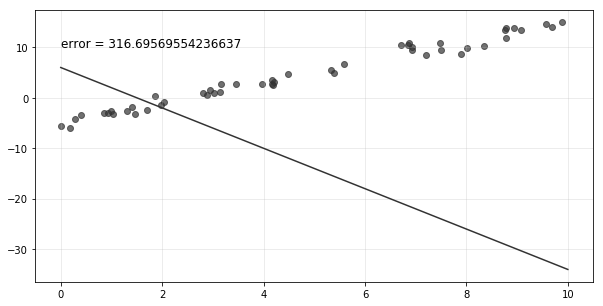

In [278]:
def get_error(x, y, theta):
    error = .0
    m = len(x)
    for i in range(m):
        error += ((theta[0] + theta[1]*x[i]) - y[i])**2
    return error / m * 0.5

theta = [np.random.randint(-10, 10), np.random.randint(-10, 10)]

xfit = np.linspace(0, 10, 1000)
yfit = theta[0] + theta[1] * xfit

error = get_error(x,y,theta)

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
ax.text(0, 10, f'error = {error}',fontsize=12,color='#000000')
plt.scatter(x,y, color='#333333', alpha=0.7)
plt.plot(xfit,yfit, color='#333333')
plt.show()

The goal here is to minimize cost function to make the hypothesis as accurate as possible.

Here comes **Gradient Descent**.
\begin{equation}
\theta_j := \theta_j - \alpha\frac{\delta}{\delta\theta_j}J(\theta_0, \theta_1)
\end{equation}

\begin{equation}
j = \left\{ \begin{array}{lcl}
0: \frac{\delta}{\delta\theta_0}J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) \\ 
1: \frac{\delta}{\delta\theta_1}J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}
\end{array}\right.
\end{equation}

In [ ]:
def gradient_decent(x, y, theta, iterations, learning_rate):
    m = len(x)
    theta_0, theta_1 = theta
    for i in range(iterations):
        tmp_0 = 0
        tmp_1 = 0
        for j in range(m):
            tmp_0 += (theta_0 + theta_1*x[j]) - y[j]
            tmp_1 += ((theta_0 + theta_1*x[j]) - y[j])*x[j]
        theta_0 -= learning_rate / m * tmp_0
        theta_1 -= learning_rate / m * tmp_1
    return [theta_0, theta_1]

iterations = 1000
learning_rate = 0.01

new_theta = gradient_decent(x, y, theta, iterations, learning_rate)
yfit = new_theta[0] + new_theta[1] * xfit

error = get_error(x,y,new_theta)

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
ax.text(0, 10, f'error = {error}',fontsize=12,color='#000000')
plt.scatter(x,y, color='#333333', alpha=0.7)
plt.plot(xfit,yfit, color='#333333')
ax.axvline(6, color='#121212', linestyle='--', linewidth=1, alpha=0.9)

plt.scatter(6,yfit[600], s=100, c='#212121', alpha=0.7)
plt.show()

It's convinent and effecient to use matrix than old school iteration.

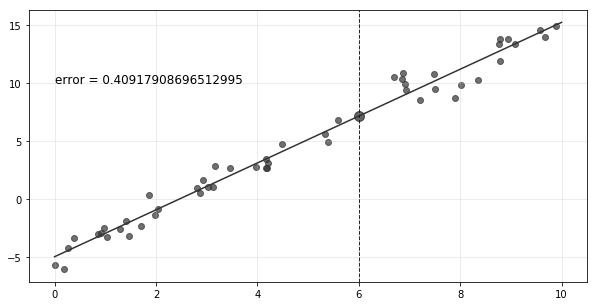

In [281]:
def gradient_decent_vector(x, y, theta, iterations, learning_rate):
    for i in range(iterations):
        theta -= learning_rate / len(y) * np.matmul(np.matmul(theta,np.transpose(x)) -y, x)
    return theta


theta = [np.random.randint(-10, 10), np.random.randint(-10, 10)]

x_vector = np.column_stack([np.ones([x.shape[0], 1]), x])

iterations = 1000
learning_rate = 0.01
new_theta = gradient_decent_vector(x_vector, y, theta, iterations, learning_rate)

xfit = np.linspace(0, 10, 1000)
yfit = new_theta[0] + new_theta[1] * xfit

error = get_error(x,y,new_theta)
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.grid(color='#b7b7b7', linestyle='-', linewidth=0.5, alpha=0.5)
ax.text(0, 10, f'error = {error}',fontsize=12,color='#000000')
plt.scatter(x,y, color='#333333', alpha=0.7)
plt.plot(xfit,yfit, color='#333333')
ax.axvline(6, color='#121212', linestyle='--', linewidth=1, alpha=0.9)
plt.scatter(6,yfit[600], s=100, c='#212121', alpha=0.7)
plt.show()